In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
# import geopandas
# gdf = geopandas.read_file("./utils/ne_10m_admin_0_countries_lakes.shp")[['ADMIN', 'ADM0_A3', 'geometry']]#.to_crs('+proj=robin')
# gdf = gdf.rename(columns = {"ADMIN":"Country", "ADM0_A3":"alpha-3"})

dfCounty = pd.read_csv("./utils/ISO-3166-Countries-with-Regional-Codes.csv")

In [2]:
df = pd.read_csv("./data-program-committee/committee.csv")
df.head()

,Name,Affiliation,Year,Role,Subcommitte,ORCID,Country,AffiliationRaw,CountryRaw,Alpha-3,WikiDataId,Region,Url,PaperCount
0,Chris Johnson,University of Glasgow,1998,Paper Chair,MobileHCI 1998,DATA-0000-0000-0001,United Kingdom of Great Britain and Northern I...,University of Glasgow,NaN,GBR,Q192775,Europe,NaN,0.0
1,Bruno von Niman,Ericsson,1999,Program Commitee,MobileHCI 1999,DATA-0000-0000-0002,Sweden,Ericsson,NaN,SWE,Q52618,Europe,https://dl.acm.org/profile/81100055896,0.0
2,Chris Johnson,University of Glasgow,1999,Program Commitee,MobileHCI 1999,DATA-0000-0000-0001,United Kingdom of Great Britain and Northern I...,University of Glasgow,NaN,GBR,Q192775,Europe,NaN,0.0
3,Elisa Delgaldo,Cambridge Technology Partners,1999,Program Commitee,MobileHCI 1999,DATA-0000-0000-0003,Japan,Cambridge Technology Partners,NaN,JPN,Q5025550,Asia,NaN,0.0
4,Judith Ramsay,Nortel,1999,Program Commitee,MobileHCI 1999,DATA-0000-0000-0004,Finland,Nortel Networks,NaN,FIN,Q464996,Europe,NaN,0.0


<Axes: >

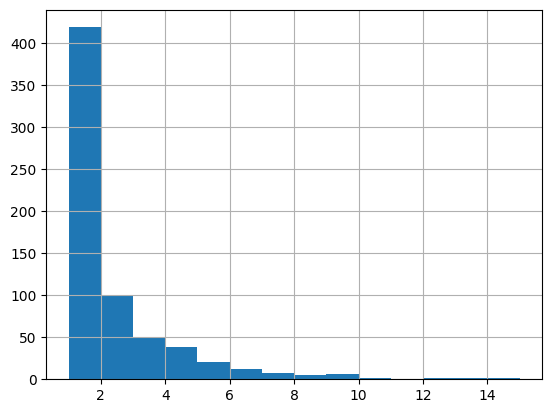

In [3]:
dfCount = df.drop_duplicates(["ORCID", "Year"]).ORCID.value_counts().reset_index()
dfCount.columns = ["ORCID", "Count"]

dfCount = pd.merge(dfCount, df[["ORCID", "Name"]].drop_duplicates(), on="ORCID")




dfYears = df.groupby("ORCID").Year.apply(lambda x: list(x)).reset_index()
dfYears = dfYears.rename(columns={"Year":"Years"})
dfCount = pd.merge(dfCount, dfYears[["ORCID", "Years"]], on="ORCID")

dfCount["YearAVG"] = dfCount.Years.apply(lambda x: np.mean(x))

dfCount = dfCount.sort_values(["Count", "YearAVG", "Name"], ascending=(False, False, True))

dfCount.Count.hist(bins=14, range=(1,15))

In [4]:
for i, e in dfCount[dfCount.Count >= dfCount[:10].Count.min()].iterrows():
    print(f"{e.Name}, {e.Count}")

Keith Cheverst, 15
Enrico Rukzio, 13
Mark Dunlop, 13
Michael Rohs, 12
Jonna Häkkilä, 10
Albrecht Schmidt, 10
Roderick Murray-Smith, 9
Kaisa Väänänen, 9
Luca Chittaro, 9
Matt Jones, 9
Stephen Brewster, 9
Bruno von Niman, 9


53


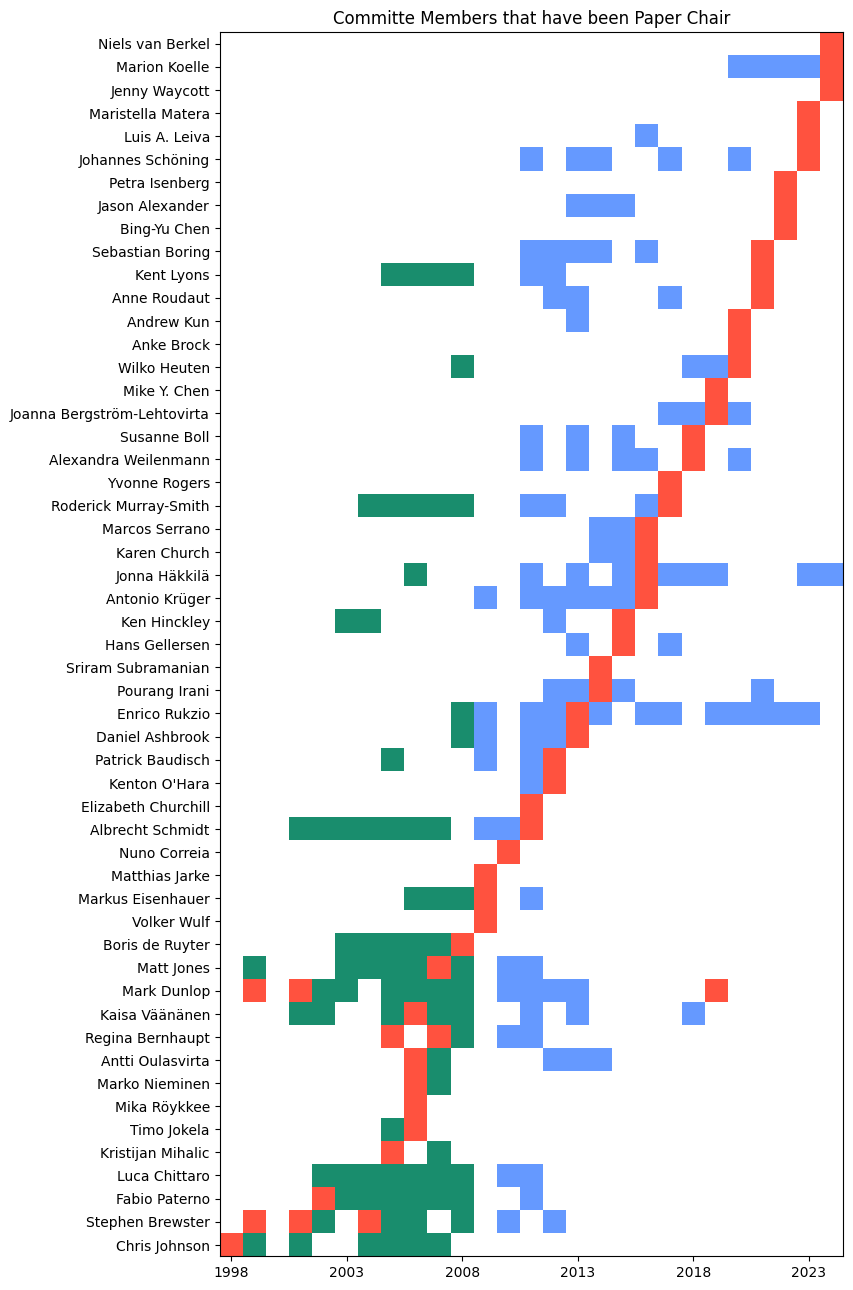

In [ ]:
dfShow = df[df.Role == "Paper Chair"]
order = dfShow.groupby("ORCID").Year.mean().reset_index()
order = order.sort_values("Year")
dfShow = df[df.Role == "Paper Chair"]
dfShow = pd.merge(dfShow, order, on="ORCID")
dfShow = dfShow.sort_values("Year_y", ascending=False)
dfShow = dfShow.drop_duplicates("ORCID", keep="first")


print(len(dfShow))
fig, ax = plt.subplots(figsize=(10, len(dfShow)*.3))
plt.imshow(np.zeros((4,8)), cmap="gray")
yticks = []
iRow = 0
for i, e1 in dfShow.iterrows():
    #print(orcid)
    dfX = df[df.ORCID == e1.ORCID]
    yticks.append(e1.Name)
    for j, e in dfX.iterrows():
        XY = (e.Year-.5, len(dfShow)-iRow-1.5)
        if (e.Role == "Associate Chair"):
            c = "#6599FF"
        elif (e.Role == "Senior Associate Chair"):
            c = "#6599FF"
        elif (e.Role == "Program Commitee"):
            c = "#6599FF"
        elif (e.Role == "Subcommittee Chair"):
            c = "yellow"
        elif (e.Role == "Paper Chair"):
            c = "#FF523F"
        elif (e.Role == "Assistant"):
            c = "blue"
        else:
            c = "#198D6D"
        rect = patches.Rectangle(XY, 1, 1, linewidth=1, facecolor=c)
        ax.add_patch(rect)
        #print(XY)
    iRow = iRow + 1
ax.set_xlim(df.Year.min()-.5, df.Year.max()+.5)
ax.set_xticks(range(df.Year.min(), df.Year.max(), 5))
ax.set_ylim(-.5,iRow-.5)

ax.set_yticks(list(reversed(list(range(len(dfShow))))), yticks)
ax.set_title(f"Committe Members that have been Paper Chair")
plt.show()

58
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Metareviewers Chair
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Metareviewers Chair
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Program Commitee
Progr

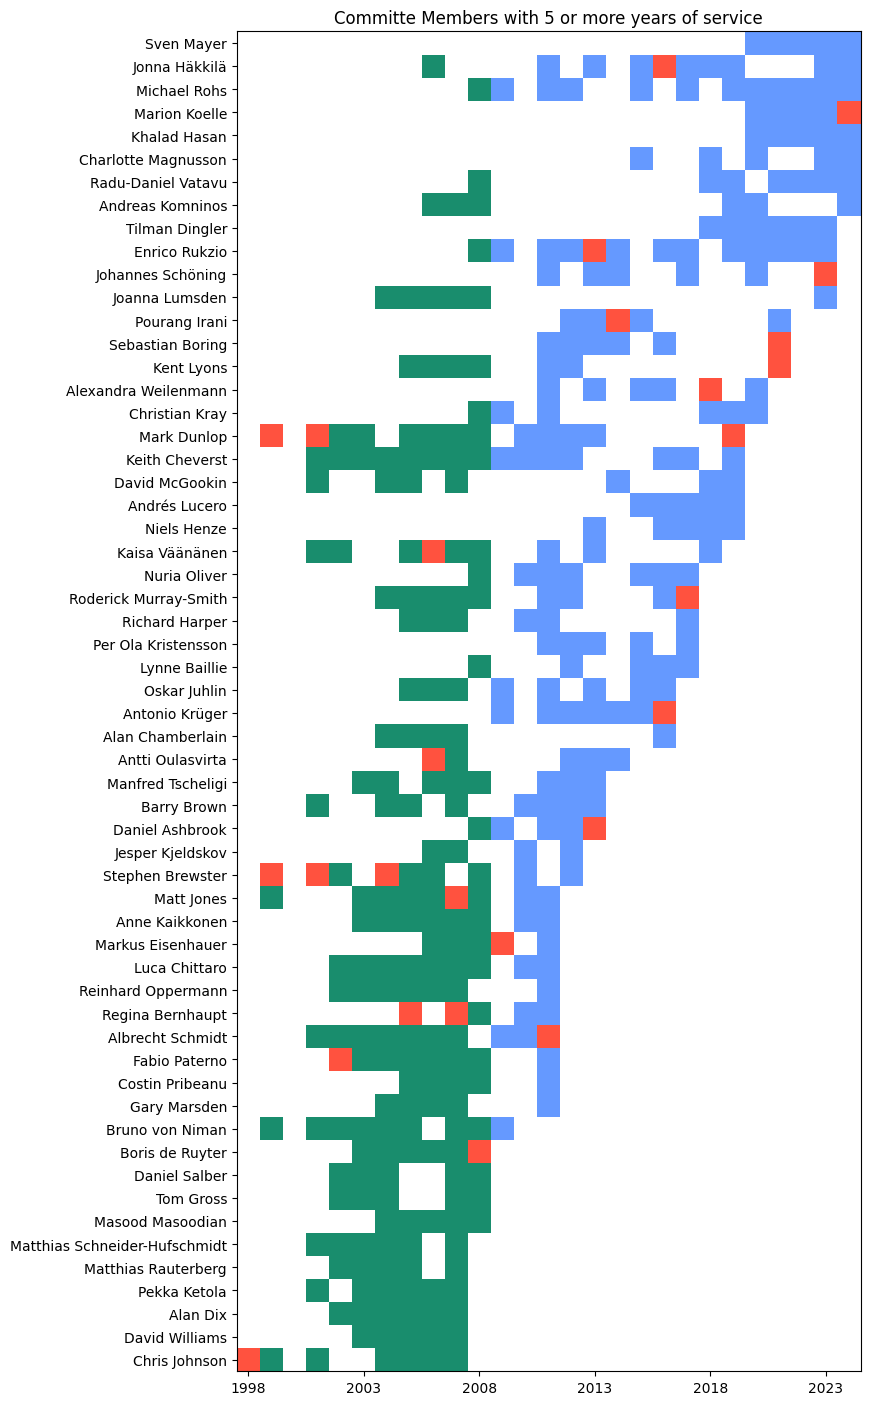

In [6]:
min_years = 5

dfX = df.groupby("ORCID").count().reset_index()

showORCID = dfX[dfX.Year >= min_years].ORCID
dfShow = df[df.ORCID.isin(showORCID)]


order = dfShow.groupby("ORCID").Year.max().reset_index()
order = order.sort_values("Year")

dfShow = pd.merge(dfShow, order, on="ORCID")
dfShow = dfShow.sort_values("Year_y", ascending=False)
dfShow = dfShow.drop_duplicates("ORCID", keep="first")

print(len(dfShow))
fig, ax = plt.subplots(figsize=(10, len(dfShow)*.3))
plt.imshow(np.zeros((4,8)), cmap="gray")
yticks = []
iRow = 0
for i, e1 in dfShow.iterrows():
    #print(orcid)
    dfX = df[df.ORCID == e1.ORCID]
    yticks.append(e1.Name)
    for j, e in dfX.iterrows():
        XY = (e.Year-.5, len(dfShow)-iRow-1.5)

        if (e.Role == "Associate Chair"):
            c = "#6599FF"
        elif (e.Role == "Senior Associate Chair"):
            c = "#6599FF"
        elif (e.Role == "Subcommittee Chair"):
            c = "yellow"
        elif (e.Role == "Paper Chair"):
            c = "#FF523F"
        elif (e.Role == "Assistant"):
            c = "blue"
        else:
            c = "#198D6D"
            print(e.Role)
        rect = patches.Rectangle(XY, 1, 1, linewidth=1, facecolor=c)
        ax.add_patch(rect)
        #print(XY)
    iRow = iRow + 1
ax.set_xlim(df.Year.min()-.5, df.Year.max()+.5)
ax.set_xticks(range(df.Year.min(), df.Year.max(), 5))
ax.set_ylim(-.5,iRow-.5)
ax.set_yticks(list(reversed(list(range(len(dfShow))))), yticks)
ax.set_title(f"Committe Members with {min_years} or more years of service")
plt.show()